In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd

In [2]:
filename=r'C:\Users\sa251\Downloads\Audio Classification\UrbanSound8K\audio\fold4\7064-6-0-0.wav'

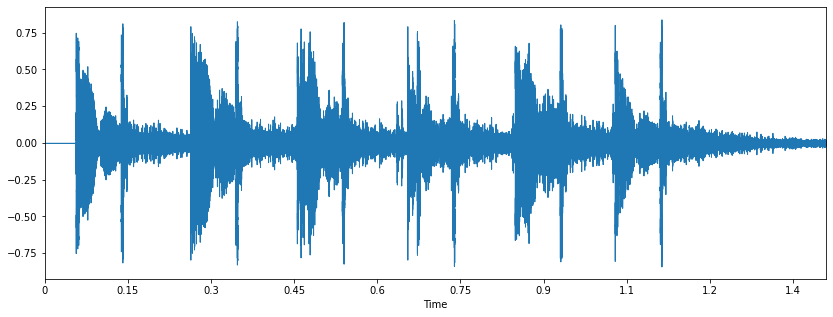

In [3]:
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [4]:
sample_rate

22050

In [5]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.00820607,
        0.00076314,  0.        ], dtype=float32)

In [6]:
import pandas as pd

In [22]:
audio_dataset_path=r'C:\Users\sa251\Downloads\Audio Classification\UrbanSound8K\audio'
metadata=pd.read_csv(r'C:\Users\sa251\Downloads\Audio Classification\UrbanSound8K\metadata\urbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [8]:
#check wheather the data is imbalanced
metadata['class'].value_counts()

jackhammer          1000
dog_bark            1000
air_conditioner     1000
street_music        1000
drilling            1000
engine_idling       1000
children_playing    1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [13]:
mfcc=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
mfcc.shape


(40, 61)

In [15]:
mfcc

array([[-5.8001379e+02, -2.0623224e+02, -2.5567274e+01, ...,
        -2.1630905e+02, -2.3012152e+02, -2.4507347e+02],
       [ 0.0000000e+00,  6.5562714e+01,  6.3322517e+01, ...,
         6.7751366e+01,  7.2139008e+01,  7.1052689e+01],
       [ 0.0000000e+00,  3.6323181e+01,  3.5127098e+01, ...,
        -1.8604481e+01, -2.0998373e+01, -2.9196131e+01],
       ...,
       [ 0.0000000e+00, -5.2655163e+00, -2.4209666e+00, ...,
         3.3860564e-01, -1.1648659e+00,  1.0655801e+00],
       [ 0.0000000e+00, -1.4802752e+00, -9.1942531e-01, ...,
        -3.9513190e+00, -2.9665942e+00, -1.1648823e+00],
       [ 0.0000000e+00, -3.4122598e+00,  7.7717030e-01, ...,
        -2.6191473e-02,  5.6687913e+00,  5.2726917e+00]], dtype=float32)

In [71]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [72]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [04:06, 19.51it/s]c:\users\sa251\anaconda3\envs\audioclassification\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8324it [08:03, 27.44it/s]c:\users\sa251\anaconda3\envs\audioclassification\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
c:\users\sa251\anaconda3\envs\audioclassification\lib\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [08:22, 17.38it/s]


In [104]:
## converting extracted_features to dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [105]:
## spliting the dataset into independent and dependent features
X=np.array(extracted_features_df['feature'].tolist())
Y=np.array(extracted_features_df['class'].tolist())

In [106]:
X.shape

(8732, 40)

In [108]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(Y))

In [128]:
metadata['class'].unique()

array(['dog_bark', 'children_playing', 'car_horn', 'air_conditioner',
       'street_music', 'gun_shot', 'siren', 'engine_idling', 'jackhammer',
       'drilling'], dtype=object)

In [78]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [79]:
X_train.shape

(6985, 40)

In [80]:
X_test.shape

(1747, 40)

In [81]:
y_train.shape

(6985, 10)

In [82]:
y_test.shape

(1747, 10)

In [83]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [85]:
num_labels=y.shape[1]
num_labels

10

In [86]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_4 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_5 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)              

In [88]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [91]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size =64
 
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
110/110 [==============================] - 0s 3ms/step - loss: 0.8617 - accuracy: 0.7138 - val_loss: 0.6728 - val_accuracy: 0.7842

Epoch 00001: val_loss improved from inf to 0.67284, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 0.8758 - accuracy: 0.7104 - val_loss: 0.6903 - val_accuracy: 0.7831

Epoch 00002: val_loss did not improve from 0.67284
Epoch 3/100
110/110 [==============================] - 0s 4ms/step - loss: 0.8671 - accuracy: 0.7042 - val_loss: 0.6917 - val_accuracy: 0.7825

Epoch 00003: val_loss did not improve from 0.67284
Epoch 4/100
110/110 [==============================] - 0s 4ms/step - loss: 0.8863 - accuracy: 0.7075 - val_loss: 0.6909 - val_accuracy: 0.7871

Epoch 00004: val_loss did not improve from 0.67284
Epoch 5/100
110/110 [==============================] - 0s 4ms/step - loss: 0.8677 - accuracy: 0.7094 - val_loss: 0.6854 - val_accuracy: 0.7865

Epoch 00005: val_los

110/110 [==============================] - 0s 3ms/step - loss: 0.8237 - accuracy: 0.7207 - val_loss: 0.6519 - val_accuracy: 0.7956

Epoch 00041: val_loss did not improve from 0.64601
Epoch 42/100
110/110 [==============================] - 0s 3ms/step - loss: 0.8189 - accuracy: 0.7271 - val_loss: 0.6610 - val_accuracy: 0.7888

Epoch 00042: val_loss did not improve from 0.64601
Epoch 43/100
110/110 [==============================] - 0s 3ms/step - loss: 0.8202 - accuracy: 0.7240 - val_loss: 0.6642 - val_accuracy: 0.7853

Epoch 00043: val_loss did not improve from 0.64601
Epoch 44/100
110/110 [==============================] - 0s 3ms/step - loss: 0.8606 - accuracy: 0.7183 - val_loss: 0.6588 - val_accuracy: 0.7928

Epoch 00044: val_loss did not improve from 0.64601
Epoch 45/100
110/110 [==============================] - 0s 3ms/step - loss: 0.8315 - accuracy: 0.7177 - val_loss: 0.6682 - val_accuracy: 0.7750

Epoch 00045: val_loss did not improve from 0.64601
Epoch 46/100
110/110 [===========

110/110 [==============================] - 0s 3ms/step - loss: 0.7984 - accuracy: 0.7291 - val_loss: 0.6279 - val_accuracy: 0.7945

Epoch 00081: val_loss did not improve from 0.62288
Epoch 82/100
110/110 [==============================] - 0s 3ms/step - loss: 0.7922 - accuracy: 0.7344 - val_loss: 0.6206 - val_accuracy: 0.8025

Epoch 00082: val_loss improved from 0.62288 to 0.62055, saving model to saved_models\audio_classification.hdf5
Epoch 83/100
110/110 [==============================] - 0s 3ms/step - loss: 0.8078 - accuracy: 0.7244 - val_loss: 0.6340 - val_accuracy: 0.7997

Epoch 00083: val_loss did not improve from 0.62055
Epoch 84/100
110/110 [==============================] - 0s 3ms/step - loss: 0.7966 - accuracy: 0.7334 - val_loss: 0.6224 - val_accuracy: 0.7934

Epoch 00084: val_loss did not improve from 0.62055
Epoch 85/100
110/110 [==============================] - 0s 3ms/step - loss: 0.7921 - accuracy: 0.7339 - val_loss: 0.6446 - val_accuracy: 0.7842

Epoch 00085: val_loss di

In [93]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7985117435455322


In [95]:
filename=r'C:\Users\sa251\Downloads\Audio Classification\UrbanSound8K/\dog_bark'
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)
model.predict_classes(prediction_feature)

c:\users\sa251\anaconda3\envs\audioclassification\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1], dtype=int64)

In [117]:
##Testing

In [131]:
filename=r"C:\Users\sa251\Downloads\Audio Classification\UrbanSound8K\audio\fold10\14470-2-0-14.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-3.13380432e+02  1.18669022e+02 -4.57986641e+01  2.23009109e+01
 -3.84053116e+01  1.47545099e+01 -2.22773228e+01 -6.05927229e-01
 -1.20489101e+01  2.47312856e+00 -1.24129858e+01 -8.75589466e+00
 -1.05308084e+01  8.62357998e+00 -7.55351496e+00  1.29577863e+00
 -9.44035816e+00 -3.59814525e+00 -9.74903107e+00  2.14627409e+00
 -1.18523245e+01  1.79227829e+00 -2.33437395e+00 -2.78381014e+00
 -2.85293412e+00 -2.28527093e+00 -4.52122545e+00  6.32497966e-02
 -3.11283731e+00 -3.68325782e+00 -4.63690853e+00 -4.45079947e+00
 -1.08728595e-01 -3.09309101e+00 -8.95261168e-02 -2.41980672e+00
 -3.61173606e+00 -2.55672789e+00 -2.05603051e+00 -7.99355328e-01]
[[-3.13380432e+02  1.18669022e+02 -4.57986641e+01  2.23009109e+01
  -3.84053116e+01  1.47545099e+01 -2.22773228e+01 -6.05927229e-01
  -1.20489101e+01  2.47312856e+00 -1.24129858e+01 -8.75589466e+00
  -1.05308084e+01  8.62357998e+00 -7.55351496e+00  1.29577863e+00
  -9.44035816e+00 -3.59814525e+00 -9.74903107e+00  2.14627409e+00
  -1.18523245e+01  

array(['children_playing'], dtype='<U16')